In [114]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm
from IPython.display import HTML

In [115]:
Nt = 500
Nx = 60
Ny = 60
x = np.linspace(-5,5,Nx)
t = np.linspace(0,10,Nt)
y = np.linspace(-5,5,Ny)
nu = 0.3
delta = x[1] - x[0]
deltat = t[1] - t[0]
print(x,y)

[-5.         -4.83050847 -4.66101695 -4.49152542 -4.3220339  -4.15254237
 -3.98305085 -3.81355932 -3.6440678  -3.47457627 -3.30508475 -3.13559322
 -2.96610169 -2.79661017 -2.62711864 -2.45762712 -2.28813559 -2.11864407
 -1.94915254 -1.77966102 -1.61016949 -1.44067797 -1.27118644 -1.10169492
 -0.93220339 -0.76271186 -0.59322034 -0.42372881 -0.25423729 -0.08474576
  0.08474576  0.25423729  0.42372881  0.59322034  0.76271186  0.93220339
  1.10169492  1.27118644  1.44067797  1.61016949  1.77966102  1.94915254
  2.11864407  2.28813559  2.45762712  2.62711864  2.79661017  2.96610169
  3.13559322  3.30508475  3.47457627  3.6440678   3.81355932  3.98305085
  4.15254237  4.3220339   4.49152542  4.66101695  4.83050847  5.        ] [-5.         -4.83050847 -4.66101695 -4.49152542 -4.3220339  -4.15254237
 -3.98305085 -3.81355932 -3.6440678  -3.47457627 -3.30508475 -3.13559322
 -2.96610169 -2.79661017 -2.62711864 -2.45762712 -2.28813559 -2.11864407
 -1.94915254 -1.77966102 -1.61016949 -1.44067797 -

In [116]:
def u1(x,y):
    return 5*np.e**(-x**2)*np.e**(-y**2)


In [117]:
def InitU():

    U = np.zeros((Nt,Nx,Ny))
    for i in range(len(x)):
      for j in range(len(y)):
        U[0,i,j] = u1(x[i],y[j])
    U[0,0,:] = 0
    U[0,-1,:] = 0
    U[0,:,0] = 0
    U[0,0,-1] = 0




    return U

In [118]:
U = InitU()

In [119]:
def GetSolution():

    for l in tqdm(range(1,len(t))):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                U[l,i,j]= U[l-1,i,j] +deltat*(nu*(U[l-1,i+1,j]-4*U[l-1,i,j]+U[l-1,i-1,j]+U[l-1,i,j+1]+U[l-1,i,j-1])/(delta**2) -U[l-1,i,j]*(U[l-1,i+1,j]-U[l-1,i-1,j]+U[l-1,i,j+1]-U[l-1,i,j-1])/(2*delta))


In [120]:
GetSolution()

100%|██████████| 499/499 [00:08<00:00, 61.41it/s]


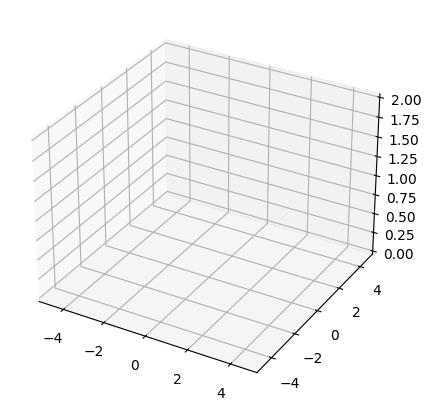

In [121]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():


    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,2)

def Update(i):

    ax.clear()
    init()

    ax.plot_surface(X,Y,U[i,:,:],cmap='viridis')

Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [122]:
HTML(Animation.to_html5_video())

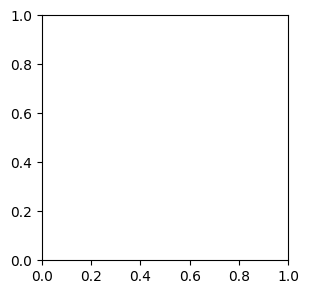

In [125]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(2,2,1)


X, Y = np.meshgrid(x,y)



def Update(i):


    plot = ax1.clear()
    init()

    surf = ax1.contourf(X,Y,U[i,:,:].T)


    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)

In [126]:
HTML(Animation.to_html5_video())